In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("C:/Users/rajkh/Desktop/project")
training_data = pd.read_csv('House_Train.csv')
test_data = pd.read_csv('House_Test.csv')

## Data Analysis Phase

In [58]:
pd.pandas.set_option('display.max_columns',None)
training_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
#Let's check missing values.
feature_na = [feature for feature in training_data.columns if training_data[feature].isnull().sum() > 1]

# Let's print features with missing values along with it's data-type.
for features in feature_na:
    print(features, np.round(training_data[features].isnull().mean() ,4), '% missing values data type: ', training_data[features].dtype)

LotFrontage 0.1774 % missing values data type:  float64
Alley 0.9377 % missing values data type:  object
MasVnrType 0.0055 % missing values data type:  object
MasVnrArea 0.0055 % missing values data type:  float64
BsmtQual 0.0253 % missing values data type:  object
BsmtCond 0.0253 % missing values data type:  object
BsmtExposure 0.026 % missing values data type:  object
BsmtFinType1 0.0253 % missing values data type:  object
BsmtFinType2 0.026 % missing values data type:  object
FireplaceQu 0.4726 % missing values data type:  object
GarageType 0.0555 % missing values data type:  object
GarageYrBlt 0.0555 % missing values data type:  float64
GarageFinish 0.0555 % missing values data type:  object
GarageQual 0.0555 % missing values data type:  object
GarageCond 0.0555 % missing values data type:  object
PoolQC 0.9952 % missing values data type:  object
Fence 0.8075 % missing values data type:  object
MiscFeature 0.963 % missing values data type:  object


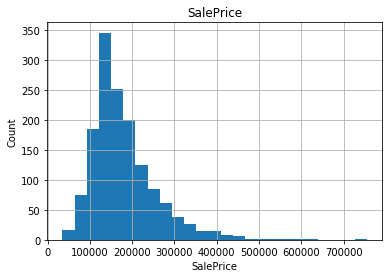

In [60]:
# Let's have a look at our target variable.
training_data['SalePrice'].hist(bins=25)
plt.xlabel('SalePrice')
plt.ylabel("Count")
plt.title('SalePrice')
plt.show()

# Clearly visible that the target variable is not normally distributed, we'll need to perform some transformation.

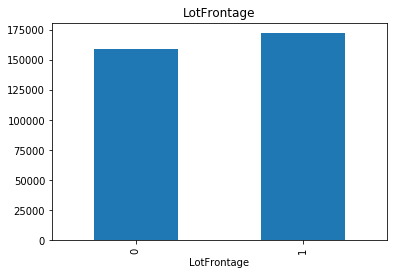

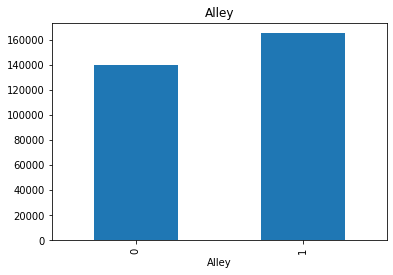

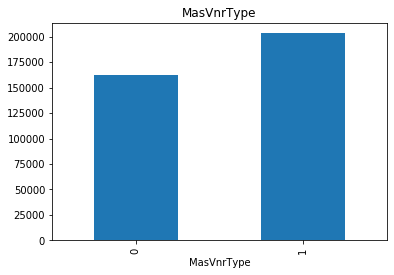

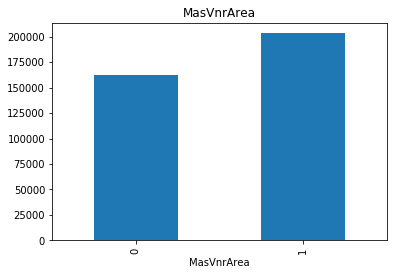

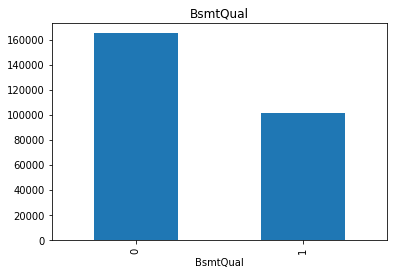

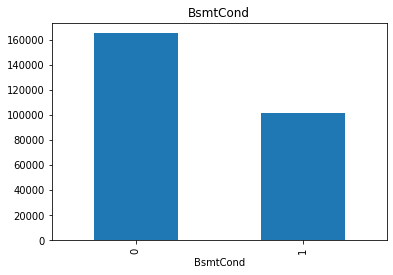

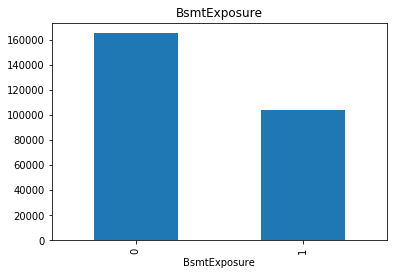

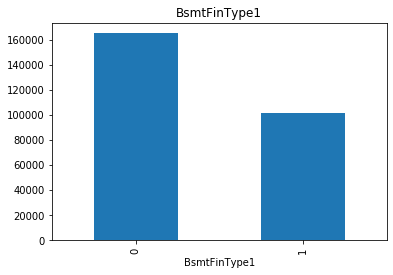

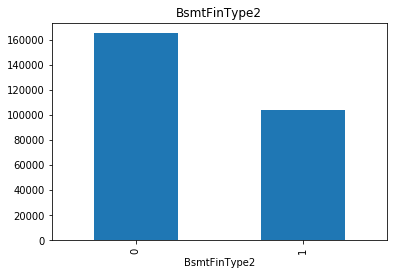

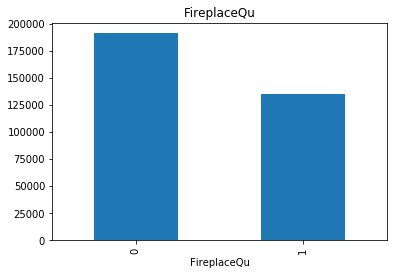

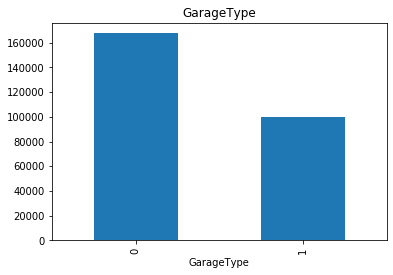

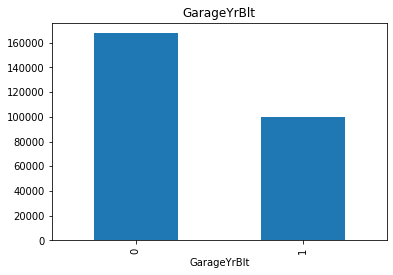

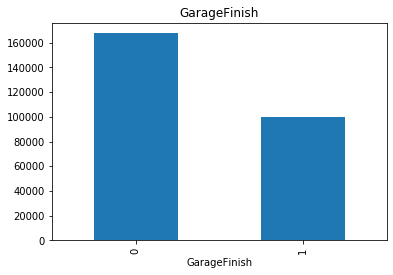

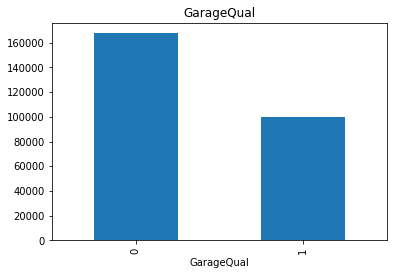

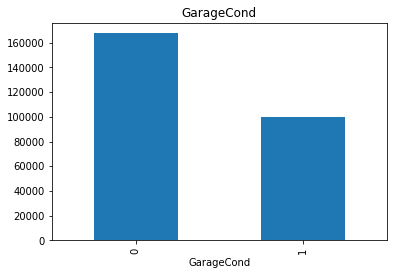

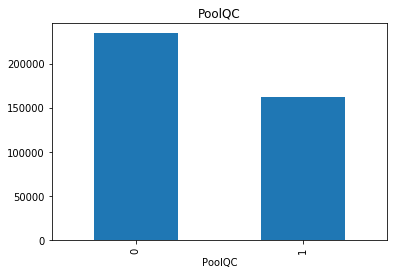

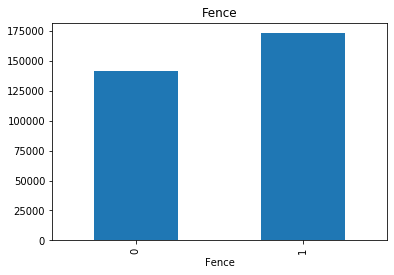

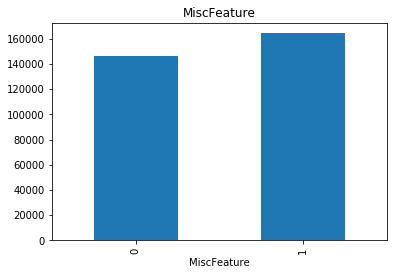

In [61]:
# we need to analyze missing values with respect to target variable to check any relationship exists.
data = training_data.copy()
for feature in feature_na:    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
# We took Median, because we saw earlier that salesprice is skewed. Features with missing values generally have high SalePrice median.
# Before imputing missign values we'll check distribution of all variables.

In [62]:
#Let's check how many numerical features do we have.
numerical_features = [features for features in training_data.columns if training_data[features].dtype !='O']
print(numerical_features)


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [63]:
# Let's check how many Temporal(Date-Time) features do we have.
temporal_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [64]:
# let's check how many unique values do each feature has.

for feature in temporal_feature:
    print(feature, " has ", len(training_data[feature].unique()), " unique values")

YearBuilt  has  112  unique values
YearRemodAdd  has  61  unique values
GarageYrBlt  has  98  unique values
YrSold  has  5  unique values


Text(0.5, 1.0, 'House Price V.S Year Sold')

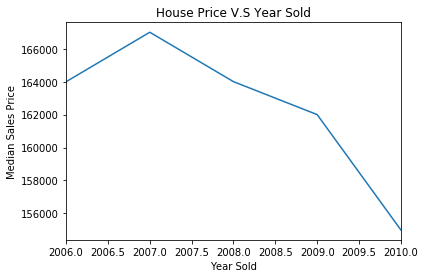

In [65]:
# let's check if yearsold has any relationship with SalePrice

training_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sales Price')
plt.title('House Price V.S Year Sold')

# This does not seems to be logigal, we'll need to find difference between Year-Sold and other temporal features only then we can say something
# For Ex. Price declines if house is too old.

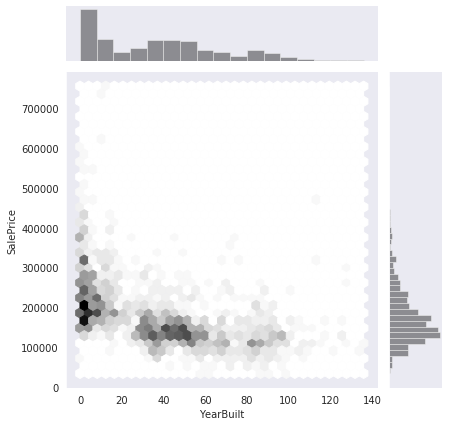

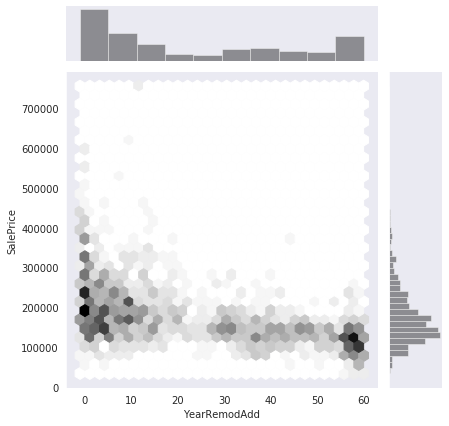

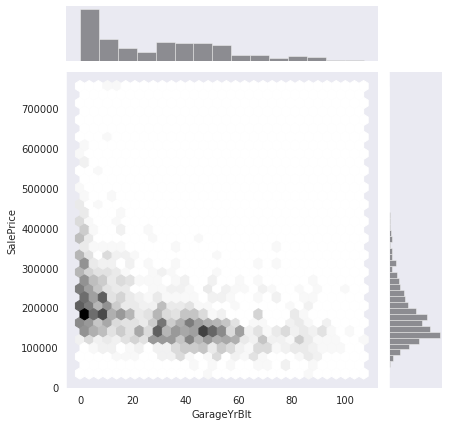

In [66]:
data = training_data.copy()
for feature in temporal_feature:
    if feature != 'YrSold':
        data[feature] = data['YrSold'] - data[feature]
        #plt.scatter(data[feature], data['SalePrice'])
        #plt.xlabel(feature)
        #plt.ylabel('SalePrice')
        #plt.show()
        with sns.axes_style("dark"):
            sns.jointplot(x=data[feature], y=data['SalePrice'], kind="hex", color="k");

#For Ex. We can clearly see that Sales Price is high when difference between Year_Built and Year_Sold was low

In [67]:
# Let's find out discrete features and plot them.

discrete_features = [feature for feature in numerical_features if len(training_data[feature].unique())<30 and feature not in temporal_feature+['Id']]
print("Discrete feature are: ", discrete_features)
print("Total Discrete features are:", len(discrete_features))

Discrete feature are:  ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
Total Discrete features are: 17


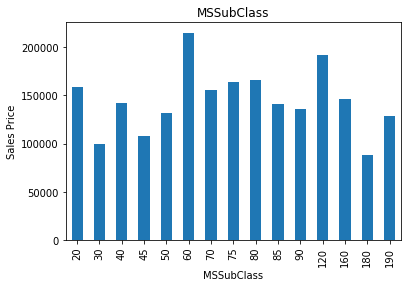

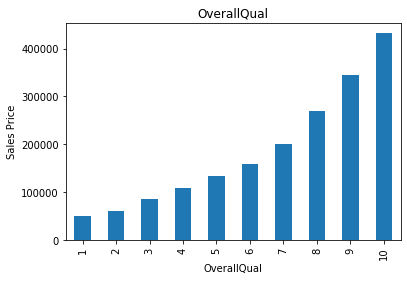

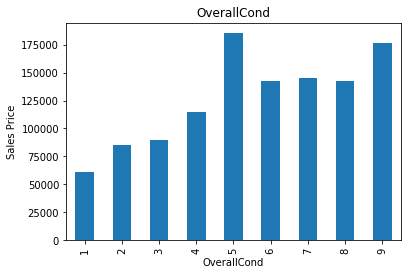

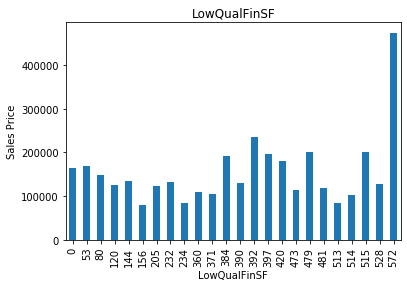

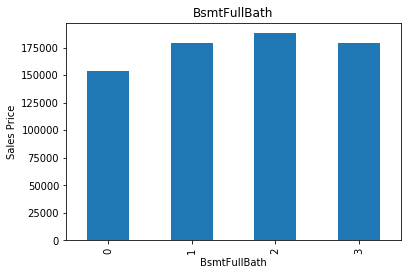

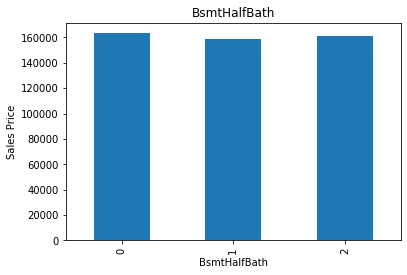

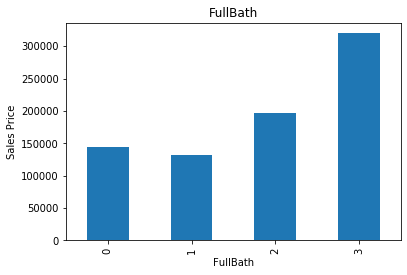

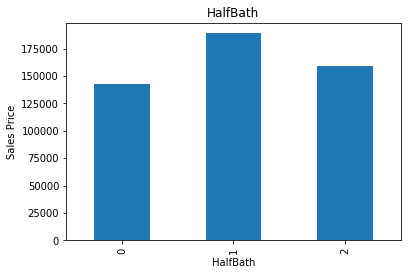

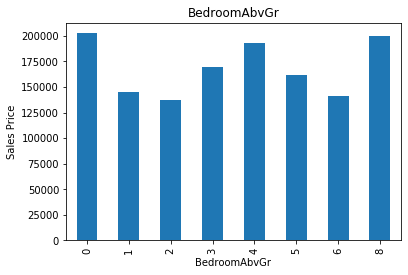

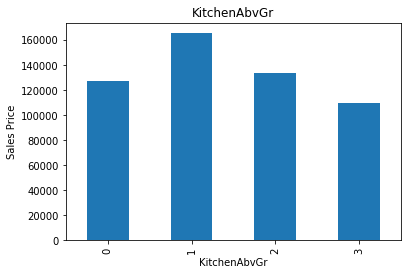

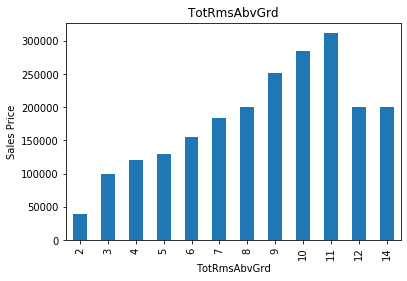

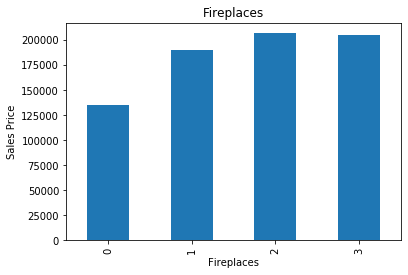

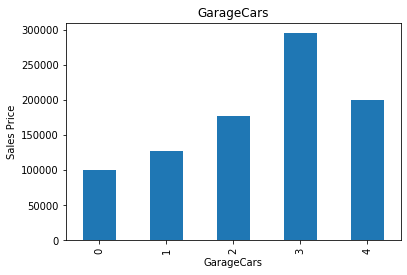

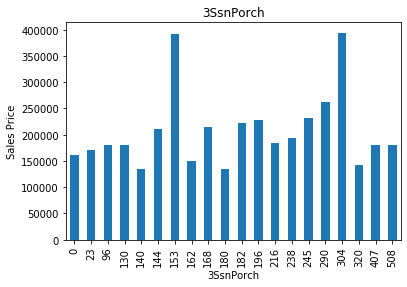

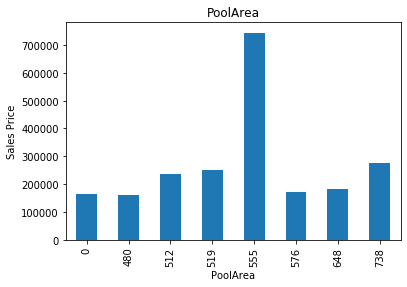

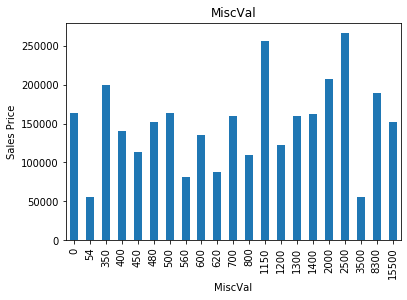

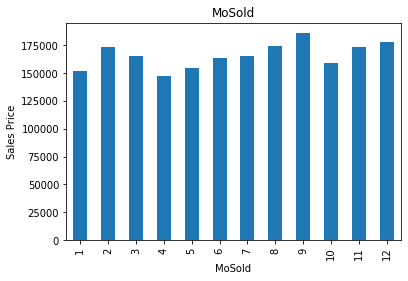

In [68]:
# let's find realtionship between discrete features and Target variable.

data = training_data.copy()
for features in discrete_features:
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Sales Price')
    plt.title(features)
    plt.show()

# If we see OverallQual feature, we can see a exponential growth.

In [69]:
conti_features = [feature for feature in numerical_features if feature not in discrete_features+temporal_feature+['Id']]
print("Continuous features are: ", conti_features)
print("Total Continuous features are:", len(conti_features))

Continuous features are:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Total Continuous features are: 16


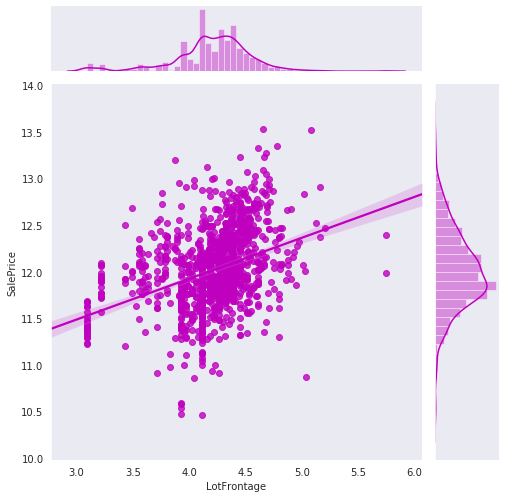

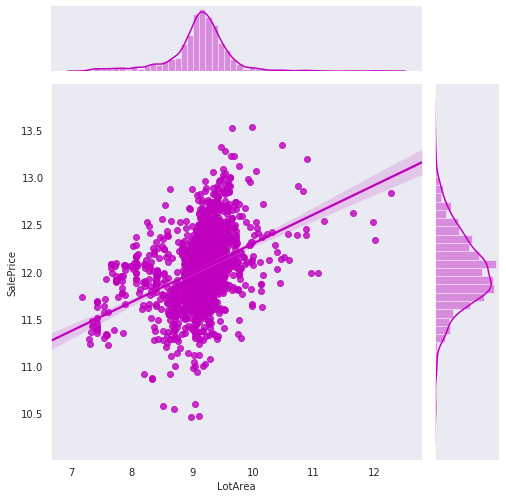

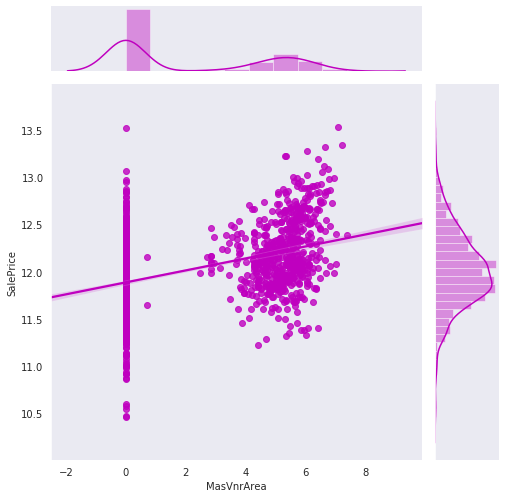

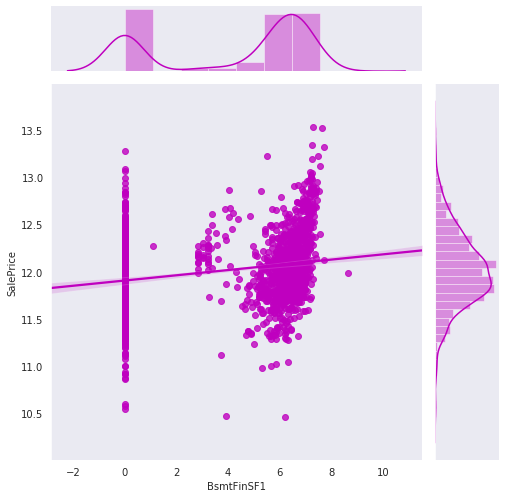

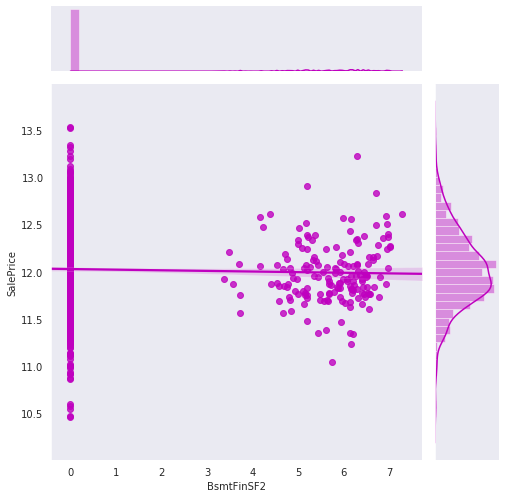

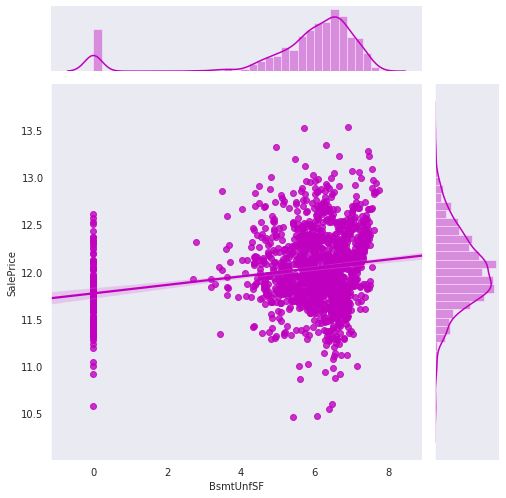

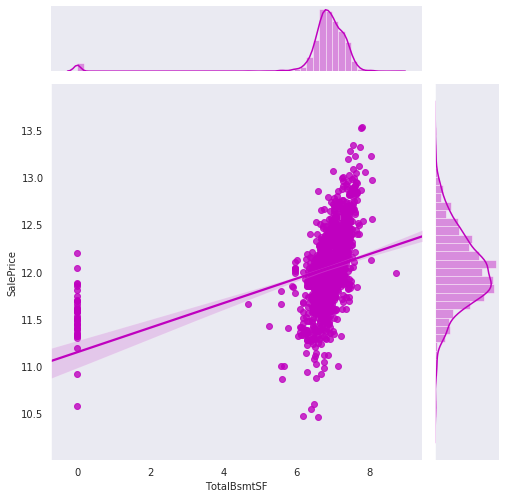

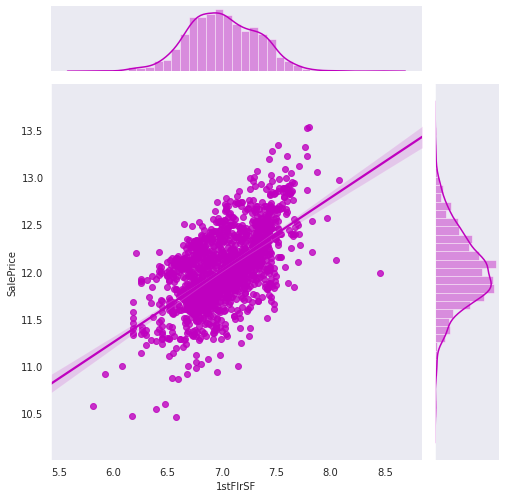

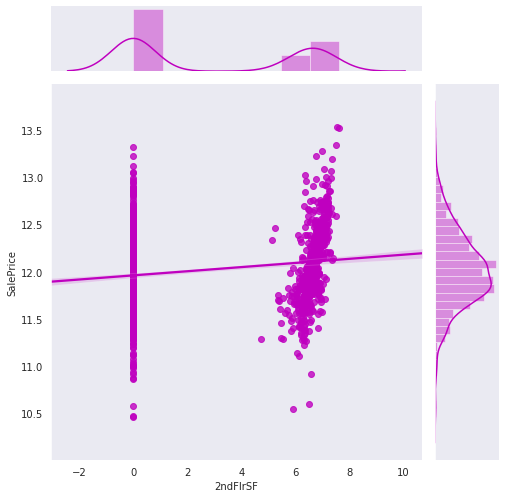

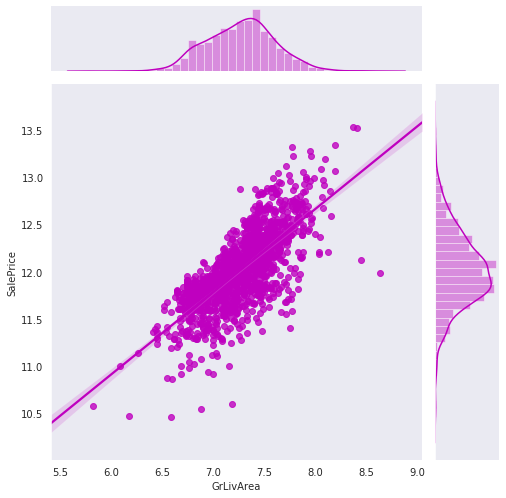

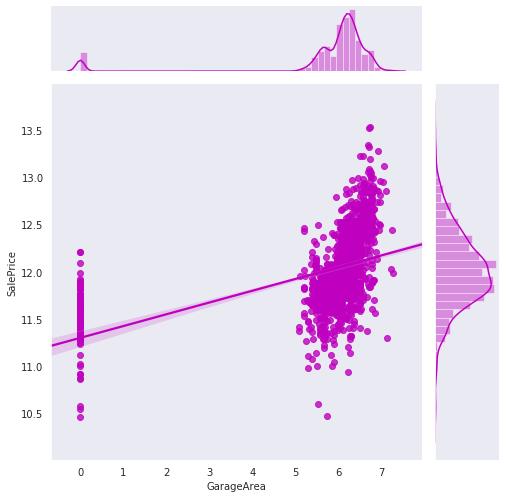

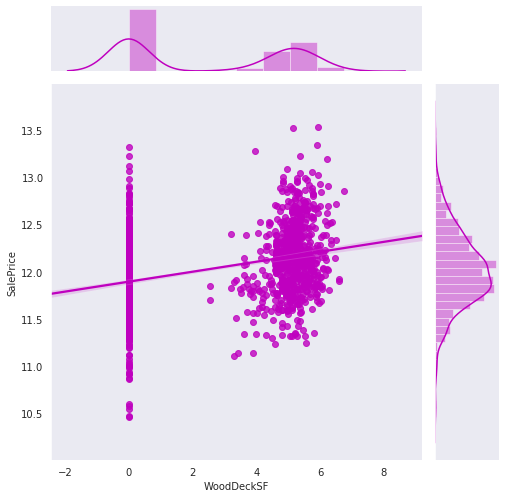

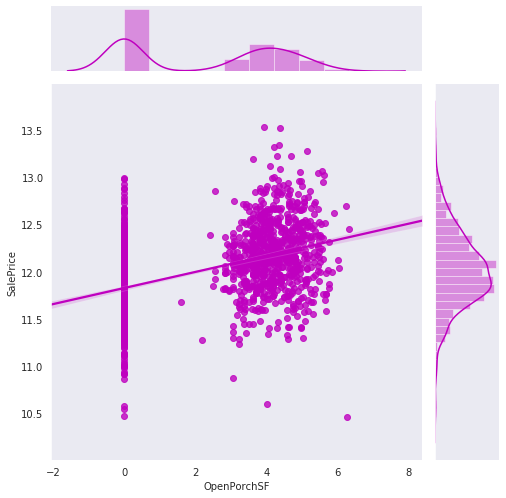

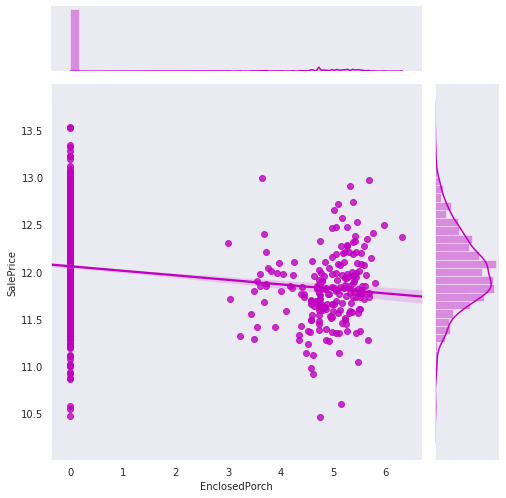

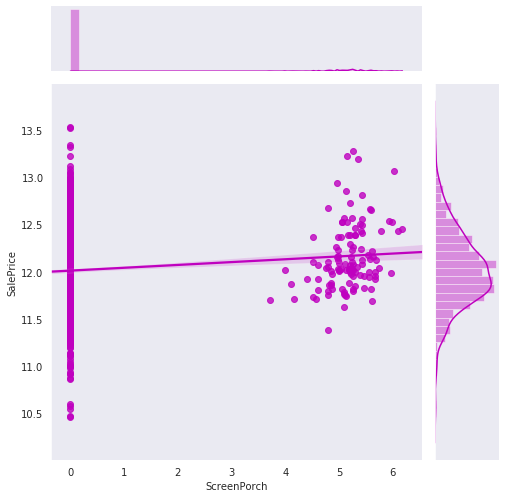

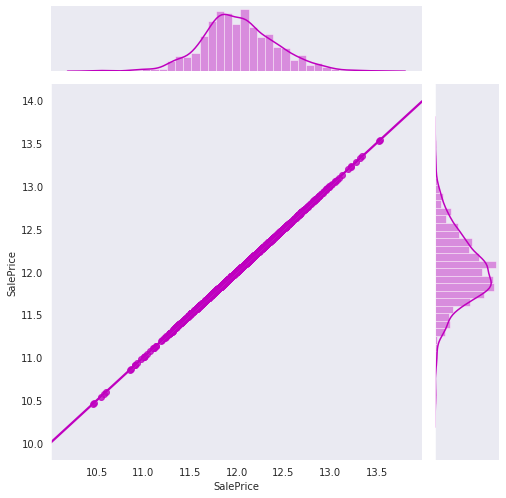

In [92]:
data = training_data.copy()
for feature in conti_features:
    with sns.axes_style("dark"):
        sns.jointplot(x=data[feature], y=data['SalePrice'], kind="reg", truncate=False,color="m", height=7);

# Clearly visible That some of the features are highly skewed and some are irrelevant. We'll need to normalize these features.

In [76]:
training_data[conti_features].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.207109,9.110966,2.131946,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,7.268512,5.808156,2.457206,2.308541,0.698019,0.410671,12.024057
std,0.346228,0.517369,2.631265,2.992052,1.845045,1.854020,1.145712,0.317431,3.293311,0.333303,1.455118,2.596435,2.152387,1.727317,1.403194,0.399449
min,3.091042,7.170888,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,4.094345,8.929898,0.000000,0.000000,0.000000,5.411646,6.680541,6.783325,0.000000,7.030415,5.815592,0.000000,0.000000,0.000000,0.000000,11.775105
50%,4.248495,9.156887,0.000000,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,7.289611,6.175867,0.000000,3.258097,0.000000,0.000000,12.001512
75%,4.394449,9.358976,5.117994,6.569832,0.000000,6.695799,7.169542,7.238676,6.591674,7.483104,6.357842,5.129899,4.234107,0.000000,0.000000,12.273736
max,5.749393,12.279537,7.378384,8.638525,7.296413,7.756623,8.717846,8.453827,7.633370,8.638171,7.257708,6.754604,6.306275,6.315358,6.175867,13.534474


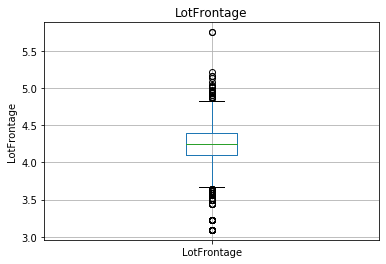

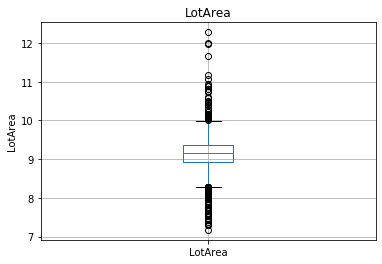

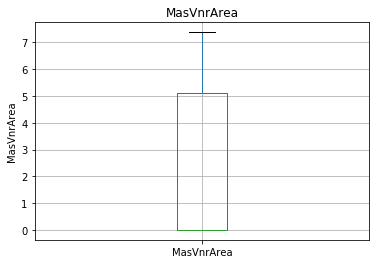

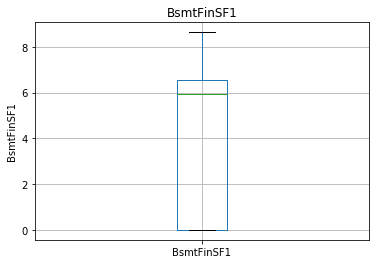

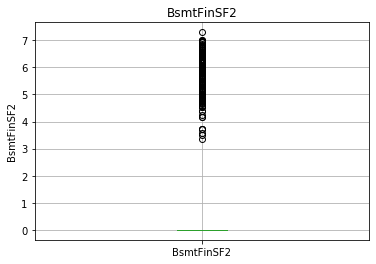

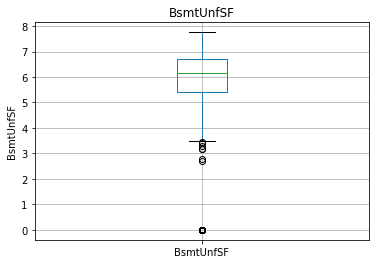

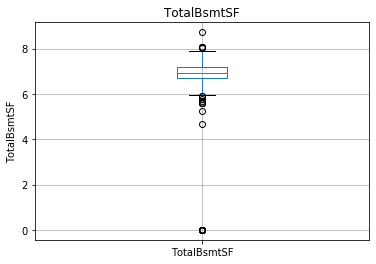

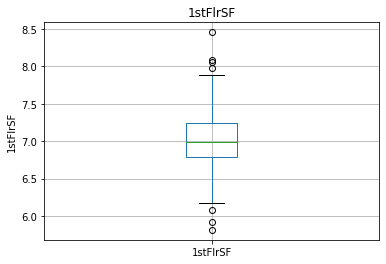

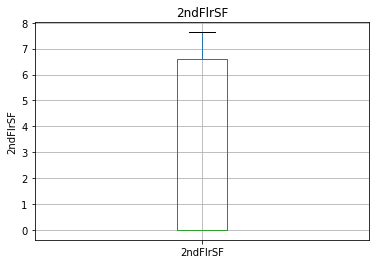

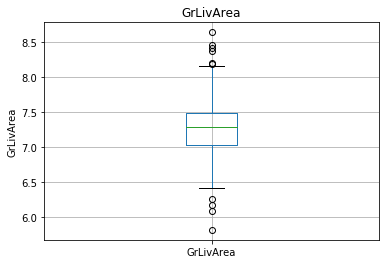

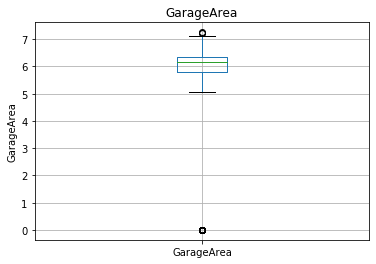

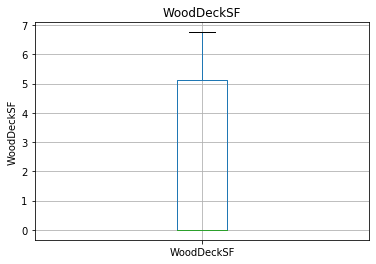

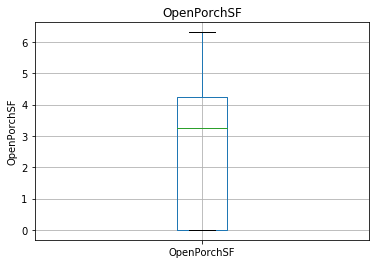

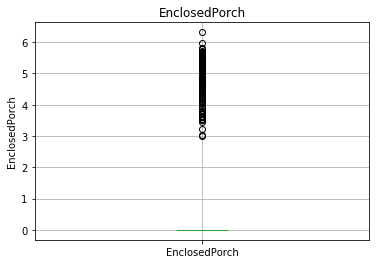

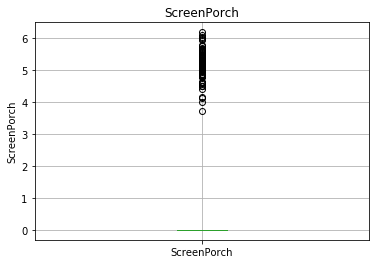

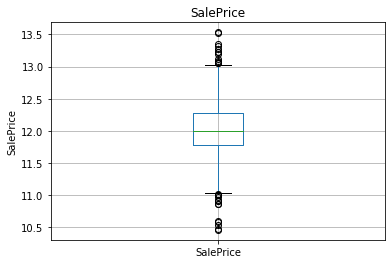

In [72]:
# We will be using logarithmic transformation and check if there are any outliers.
data = training_data.copy()
for feature in conti_features:
    training_data[feature] = np.log(training_data[feature] + 1)
    training_data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# We'll need to work on outliers and exclude some features that have high 0 values.

In [73]:
# Let's find out how many Categorical variables do we have.

cat_features = [feature for feature in training_data.columns if training_data[feature].dtype == 'O']
print("Categorical features are: ", cat_features)
print("Count of Categorical features:", len(cat_features))

Categorical features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Count of Categorical features: 43


In [74]:
# Let's find out how many unique categories are present in each categorical variable

for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(training_data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

C:\Users\rajkh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


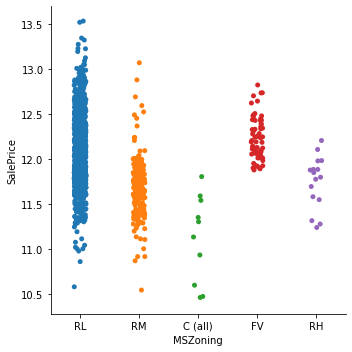

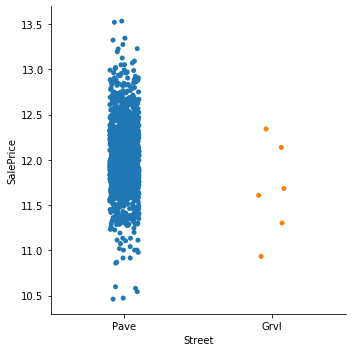

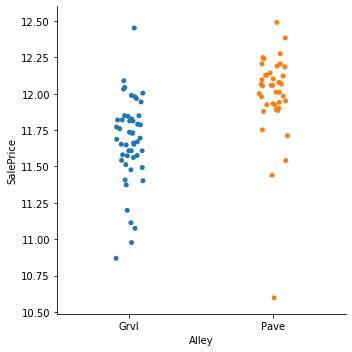

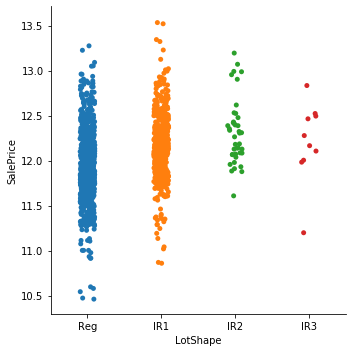

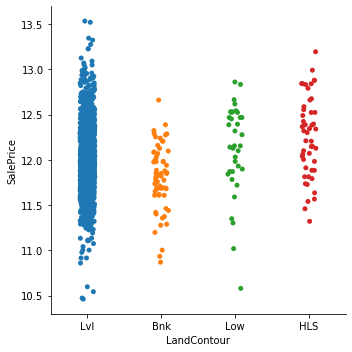

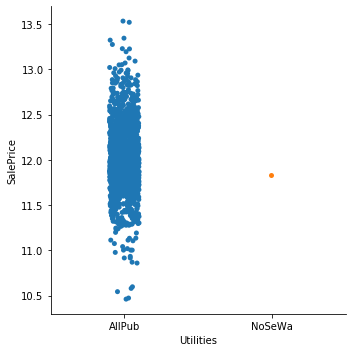

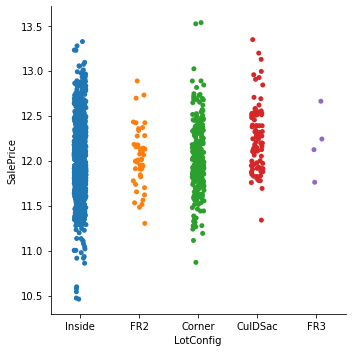

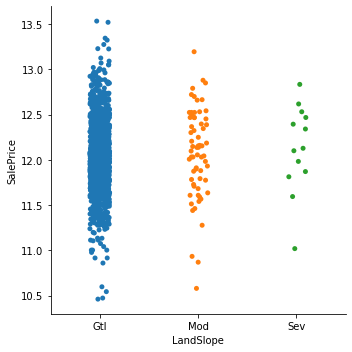

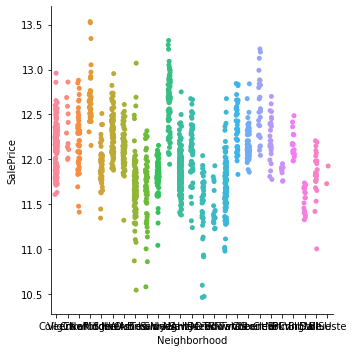

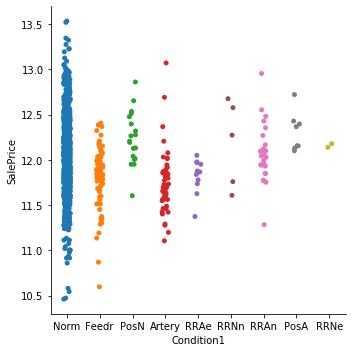

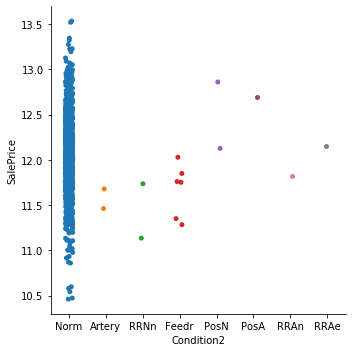

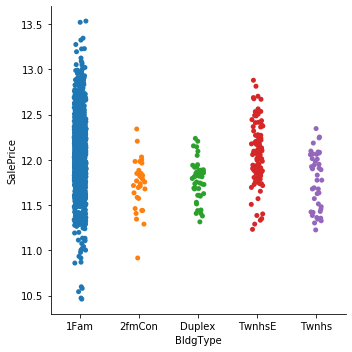

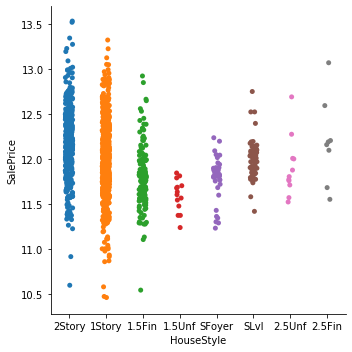

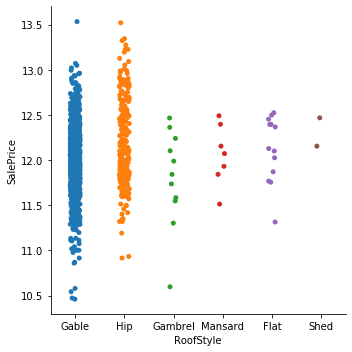

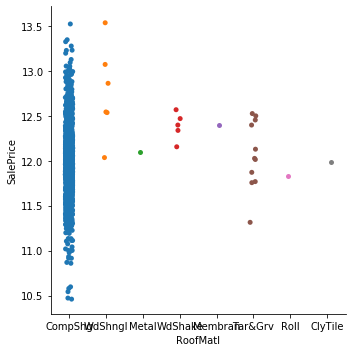

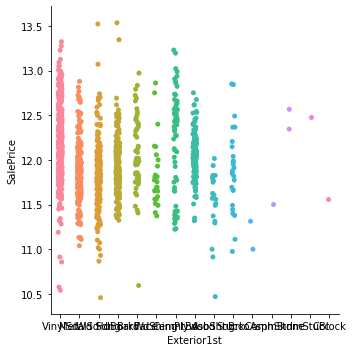

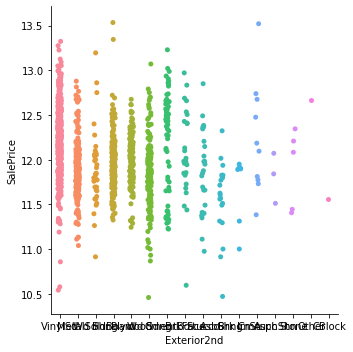

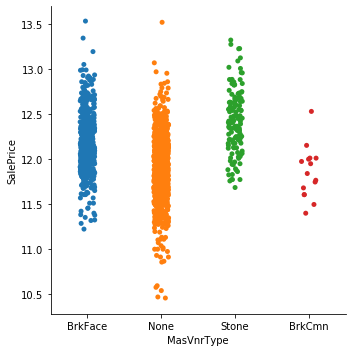

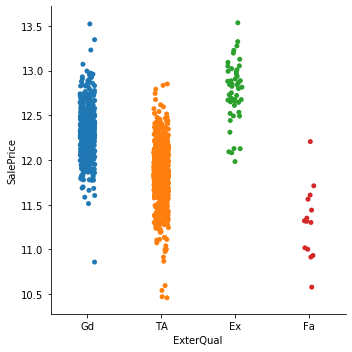

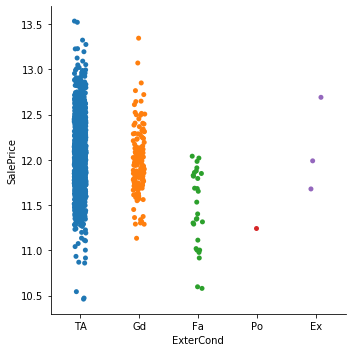

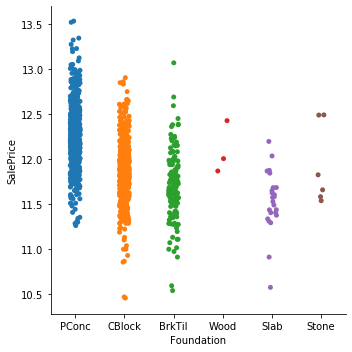

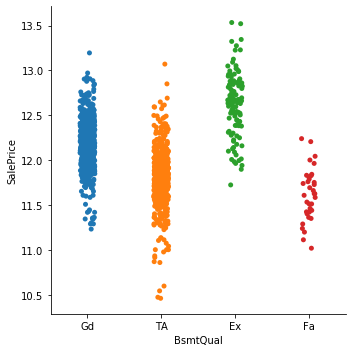

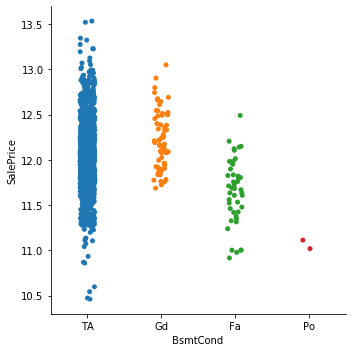

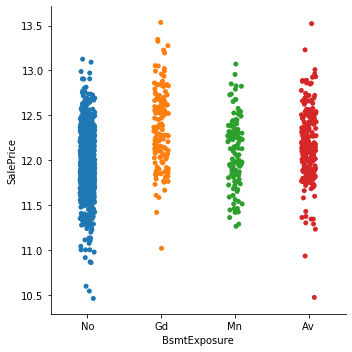

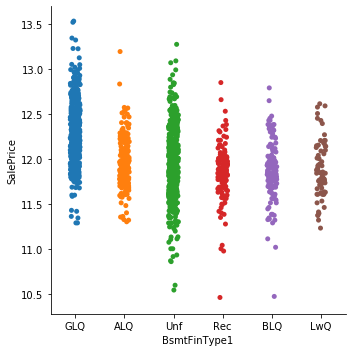

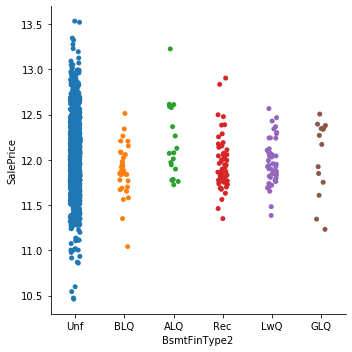

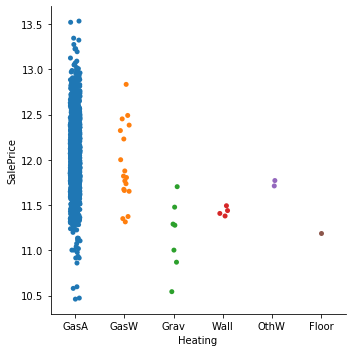

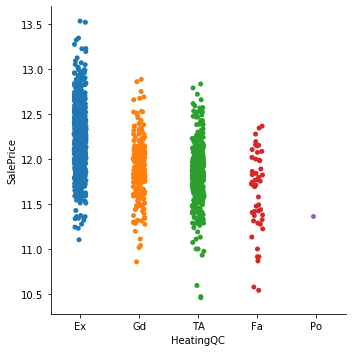

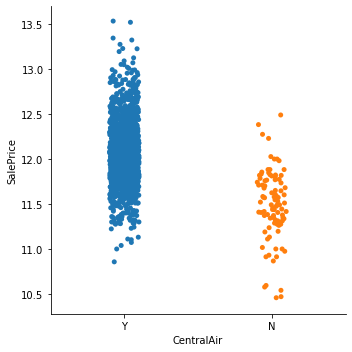

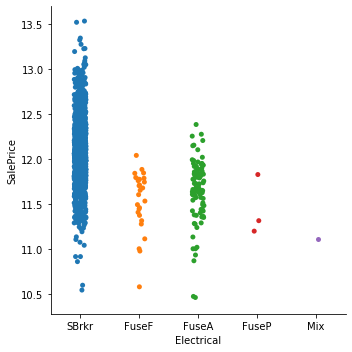

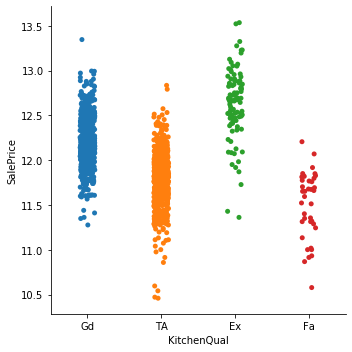

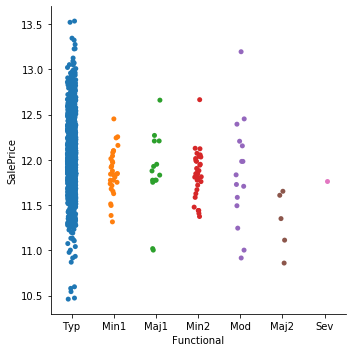

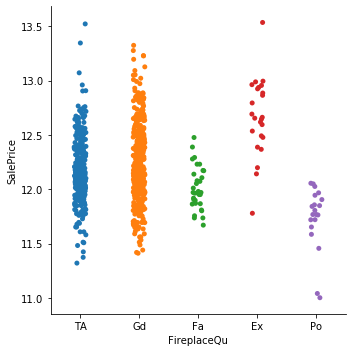

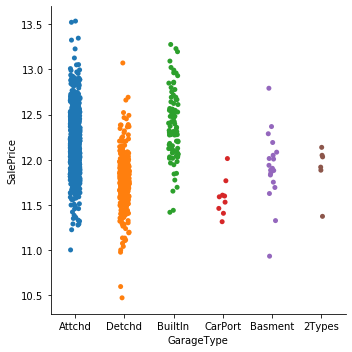

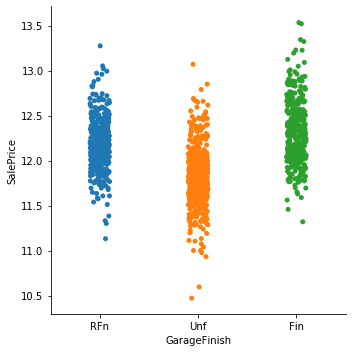

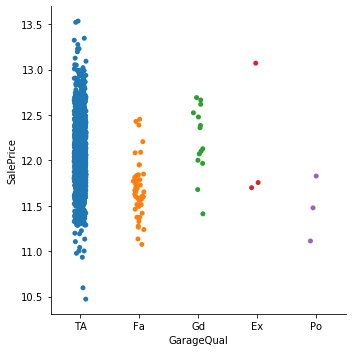

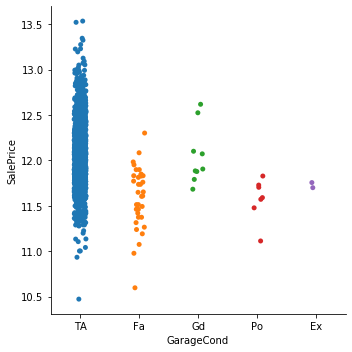

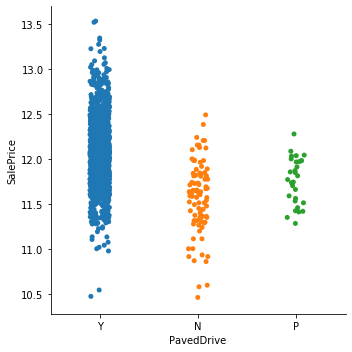

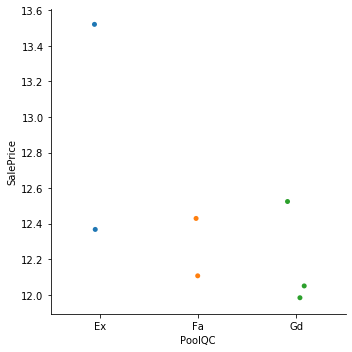

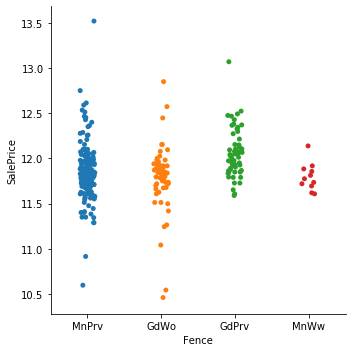

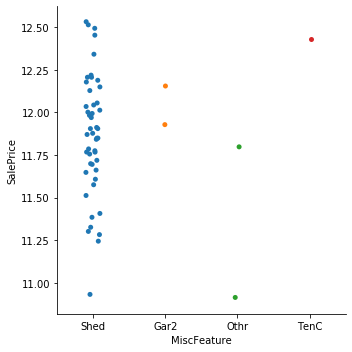

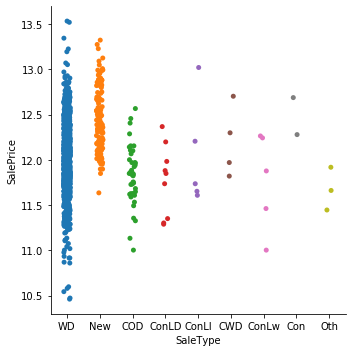

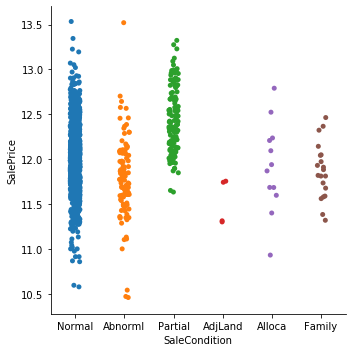

In [75]:
# Let's analyze them.
for features in cat_features:
    sns.catplot(x=features, y="SalePrice", data = training_data);

## Feature Engineering Phase (We'll handle following tasks)
1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [79]:
# We'll handle missing values in categorical variables first. 
# In analysis phase we had made a list comprehension for missing values, we will use that to find out variables with object datatype.

cat_feature_na = [feature for feature in feature_na if training_data[feature].dtype == 'O']

for feature in cat_feature_na:
    print("{}: {}% missing values".format(feature,np.round(training_data[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [81]:
# Replacing missing values in categorical variables with a new lable called " Missing " this can help us find some trend.
def cat_missing_values(training_data, cat_features):
    data = training_data.copy()
    data[cat_features] = data[cat_features].fillna('Missing')
    return data
training_data = cat_missing_values(training_data, cat_feature_na)


In [82]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220


In [83]:
training_data[cat_feature_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [87]:
# Let's handle missing values of numerical variables.

numerical_feature_na = [feature for feature in feature_na if training_data[feature].dtype != 'O']
for feature in numerical_feature_na:
    print("{}: {}% missing values".format(feature,np.round(training_data[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


In [94]:
training_data[numerical_feature_na].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,4.207109,2.131946,1978.506164
std,0.346228,2.631265,24.689725
min,3.091042,0.000000,1900.000000
25%,4.094345,0.000000,1961.000000
50%,4.248495,0.000000,1980.000000
75%,4.394449,5.117994,2002.000000
max,5.749393,7.378384,2010.000000


In [98]:
for feature in numerical_feature_na:
    feature_mean = training_data[feature].mean()
    data = training_data.copy()
    training_data[feature].fillna(feature_mean,inplace=True)
training_data[numerical_feature_na].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,4.207109,2.131946,1978.506164
std,0.313997,2.624041,23.994583
min,3.091042,0.000000,1900.000000
25%,4.110874,0.000000,1962.000000
50%,4.207109,0.000000,1978.506164
75%,4.382027,5.107456,2001.000000
max,5.749393,7.378384,2010.000000


In [99]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    training_data[feature] = training_data['YrSold'] - training_data[feature]

In [100]:
training_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
